<a href="https://colab.research.google.com/github/SamiraHabib/Coursera_Capstone/blob/main/Coursera_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coursera Capstone** #

### **Applied Data Science Capstone by IBM/Coursera**

### **Table of contents**

* Introduction: Business Problem
* Data
* Methodology
* Analysis
* Results and Discussion
* Conclusion



## **Introduction: Business Problem** ##

### In this project, we will try to find an ideal location for a stationery store. Specifically, this report will be directed to interested parties interested in opening a stationery shop near Maranã, Rio de Janeiro.
### The aim of the study is to find locations that have little or no competition, in the vicinity of schools, specifically in that chosen location. Opting for locations closer to the city center of Rio de Janeiro.
### We will use the final analysis to find neighborhoods that contain a satisfactory number for the proposed business model. As well as the advantages and disadvantages of each area, they will be clarified and addressed for a better evaluation by the interested parties in choosing the appropriate location.

## **Data**
Based on definition of our problem, factors that will influence our decission are:
*   Number of schools in the neighborhood
*   Number and distance of stationers in the neighborhood, if any
*   Distance from the neighborhood to the city center

In this case study, I decided to use a grid of places with regular spacing, centered in the center of Maracanã, to define our neighborhoods.

The following data sources will be needed to extract / generate the necessary information:

*   Number of schools and their type and location in each neighborhood will be obtained using the **Foursquare API**
*   Number of stationers and their type and location in each neighborhood will also be obtained using the **Foursquare API**







# Improtting libraries #

These libraries need to be declared for use by your applications in the problem

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 81kB 4.8MB/s 
  Created wheel for folium: filename=folium-0.5.0-cp37-none-any.whl size=76240 sha256=ab0b3704406b80b87c5d94581835183c127d1af4a9c6cb9d91548a7f38b3bf59
  Stored in directory: /root/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.5.0 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
Folium installed
Libraries imported.


# **Foursquare** #

We will use the Foursquare API to obtain information about schools in the vicinity of Maracanã.

We will filter through all nearby schools expressed in latitudes and longitudes. Therefore, we will include in our list only those places that have 'colleges' in their name.

Foursquare credentials are defined in the cell below.


In [2]:
CLIENT_ID = '1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA' # your Foursquare ID
CLIENT_SECRET = 'ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA
CLIENT_SECRET:ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D


## **Address of chosen location** ##

In [3]:
#Exemplo - alterar
address = 'Rio de Janeiro, Maracanã'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-22.912161949999998 -43.23117510590559


## Location ##

In [4]:
#Localidade exemplo, mudar
latitude = -22.912161949999998 
longitude = -43.23117510590559

In [5]:
search_query = 'colégio'
radius = 2000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

colégio .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA&client_secret=ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D&ll=-22.912161949999998,-43.23117510590559&v=20180604&query=colégio&radius=2000&limit=50'

## Submit a request and review the results ##

In [6]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6086bf44e6ed807a550e85a7'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d13b941735',
      'name': 'School',
      'pluralName': 'Schools',
      'primary': True,
      'shortName': 'School'}],
    'hasPerk': False,
    'id': '4dc1528422713750ba79c2ad',
    'location': {'address': 'R. S. Francisco Xavier, 267',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'country': 'Brasil',
     'distance': 660,
     'formattedAddress': ['R. S. Francisco Xavier, 267',
      'Rio de Janeiro, RJ',
      '20550-010',
      'Brasil'],
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.916797220457074,
       'lng': -43.227150214751354}],
     'lat': -22.916797220457074,
     'lng': -43.227150214751354,
     'postalCode': '20550-010',
     'state': 'RJ'},
    'name': 'Colégio Militar do Rio de Janeiro (CMRJ)',
    'referra

## Taking the relevant part of JSON and turning it into a dataframe ##

In [7]:
venues = results['response']['venues']
df_school = json_normalize(venues)
df_school.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4dc1528422713750ba79c2ad,Colégio Militar do Rio de Janeiro (CMRJ),"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619443524,False,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,20550-010,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",NaN
1,4dbfe92c4b2221ec2d640bac,Colégio Batista,[],v-1619443524,False,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",Maracanã
2,512b53c1e4b0fd3b1159b204,Colégio Ressurreição,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619443524,False,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",NaN
3,5071a03ce4b0e1b65ea15489,Colégio Pedro II,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619443524,False,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,20550-012,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",Campus Tijuca II
4,4ea5556577c8d0ce5f233bbb,Colégio Colégio Nossa Senhora de Lourdes (NSL),"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1619443524,False,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,20550-201,BR,Rio de Janeiro,RJ,Brasil,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",NaN


## Defines the information of interest and filters the dataframe ##

In [8]:
# Mantém somente as colunas que incluem venue name e qualquer coisa que é associada com a localização
filtered_columns = ['name', 'categories'] + [col for col in df_school.columns if col.startswith('location.')] + ['id']
df_school_filtered = df_school.loc[:, filtered_columns]

# função que extrai a categoria de venue 
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filtra a categoria por cada linha do data frame
df_school_filtered['categories'] = df_school_filtered.apply(get_category_type, axis=1)

# limpa os nomes das colunas para manter somente o último termo
df_school_filtered.columns = [column.split('.')[-1] for column in df_school_filtered.columns]

df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,20550-010,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",NaN,4dc1528422713750ba79c2ad
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",Maracanã,4dbfe92c4b2221ec2d640bac
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",NaN,512b53c1e4b0fd3b1159b204
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,20550-012,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",Campus Tijuca II,5071a03ce4b0e1b65ea15489
4,Colégio Colégio Nossa Senhora de Lourdes (NSL),Private School,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,20550-201,BR,Rio de Janeiro,RJ,Brasil,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",NaN,4ea5556577c8d0ce5f233bbb


## Data evaluation: ##

In [9]:
df_school_filtered.dtypes

name                 object
categories           object
address              object
lat                 float64
lng                 float64
labeledLatLngs       object
distance              int64
postalCode           object
cc                   object
city                 object
state                object
country              object
formattedAddress     object
crossStreet          object
id                   object
dtype: object

In [10]:
df_school_filtered.describe()

,lat,lng,distance
count,50.000000,50.000000,50.000000
mean,-22.916902,-43.230423,1198.180000
std,0.006735,0.008967,481.000687
min,-22.931675,-43.245888,221.000000
25%,-22.921262,-43.238463,807.500000
50%,-22.916570,-43.230589,1236.500000
75%,-22.914015,-43.222731,1550.250000
max,-22.899421,-43.214707,2213.000000


In [11]:
df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,20550-010,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",NaN,4dc1528422713750ba79c2ad
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",Maracanã,4dbfe92c4b2221ec2d640bac
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",NaN,512b53c1e4b0fd3b1159b204
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,20550-012,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",Campus Tijuca II,5071a03ce4b0e1b65ea15489
4,Colégio Colégio Nossa Senhora de Lourdes (NSL),Private School,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,20550-201,BR,Rio de Janeiro,RJ,Brasil,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",NaN,4ea5556577c8d0ce5f233bbb


## Null number of columns: ##

In [12]:
print("Number of NaN values for the column city :", df_school_filtered['city'].isnull().sum())
print("Number of NaN values for the column state :", df_school_filtered['state'].isnull().sum())
print("Number of NaN values for the column crossStreet :", df_school_filtered['crossStreet'].isnull().sum())

Number of NaN values for the column city : 13
Number of NaN values for the column state : 13
Number of NaN values for the column crossStreet : 45


In [13]:
df_school_filtered['state'].replace(np.nan,"RJ", inplace=True)

In [14]:
df_school_filtered['city'].replace(np.nan,"Rio de Janeiro", inplace=True)

In [15]:
print("Number of NaN values for the column state :", df_school_filtered['state'].isnull().sum())
print("Number of NaN values for the column city :", df_school_filtered['city'].isnull().sum())

Number of NaN values for the column state : 0
Number of NaN values for the column city : 0


In [16]:
df_school_filtered['categories'].value_counts()

School                             14
High School                        11
Private School                      7
College Classroom                   3
Student Center                      2
College Academic Building           2
Community College                   2
College Administrative Building     2
Nursery School                      1
General College & University        1
Religious School                    1
Trade School                        1
Church                              1
Name: categories, dtype: int64

In [17]:
df_school_filtered.isnull().sum()

name                 0
categories           2
address             12
lat                  0
lng                  0
labeledLatLngs       0
distance             0
postalCode          28
cc                   0
city                 0
state                0
country              0
formattedAddress     0
crossStreet         45
id                   0
dtype: int64

## Dropping columns that will not be used for analysis ##





In [18]:
df_school_filtered.drop('crossStreet', axis=1, inplace=True)
df_school_filtered.drop('postalCode', axis=1, inplace=True)
df_school_filtered.drop('cc', axis=1, inplace=True)
df_school_filtered.drop('city', axis=1, inplace=True)
df_school_filtered.drop('state', axis=1, inplace=True)
df_school_filtered.drop('country', axis=1, inplace=True)

In [19]:
df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",4dc1528422713750ba79c2ad
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",4dbfe92c4b2221ec2d640bac
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",512b53c1e4b0fd3b1159b204
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",5071a03ce4b0e1b65ea15489
4,Colégio Colégio Nossa Senhora de Lourdes (NSL),Private School,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",4ea5556577c8d0ce5f233bbb


In [20]:
df_school_filtered['name'].count()

50

In [21]:
df_school_filtered=df_school_filtered.assign(id_global=1)
print(df_school_filtered)

                                              name  ... id_global
0         Colégio Militar do Rio de Janeiro (CMRJ)  ...         1
1                                  Colégio Batista  ...         1
2                             Colégio Ressurreição  ...         1
3                                 Colégio Pedro II  ...         1
4   Colégio Colégio Nossa Senhora de Lourdes (NSL)  ...         1
5                       Colégio Pinheiro Guimarães  ...         1
6                                       Colégio Qi  ...         1
7                               Colégio e Curso pH  ...         1
8                            Pensi Colégio e Curso  ...         1
9                            Pensi Colégio e Curso  ...         1
10                           Colégio Curso Martins  ...         1
11              Colégio Curso Intellectus - Tijuca  ...         1
12                                Colégio Pedro II  ...         1
13           Colégio Nossa Senhora da Misericórdia  ...         1
14        

## Name of columns and category of each college ##

In [57]:
df_school_filtered.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'labeledLatLngs',
       'distance', 'formattedAddress', 'id', 'id_global'],
      dtype='object')

In [58]:
df_school_filtered.categories

0                              School
1                                None
2                              School
3                              School
4                      Private School
5                              School
6                      Private School
7                         High School
8                      Private School
9                      Private School
10                             School
11                        High School
12                        High School
13                   Religious School
14       General College & University
15                  College Classroom
16                             School
17                     Private School
18                        High School
19                        High School
20                  Community College
21                     Student Center
22                        High School
23                        High School
24                             Church
25                             School
26          

In [59]:
df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id,id_global
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",4dc1528422713750ba79c2ad,1
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",4dbfe92c4b2221ec2d640bac,1
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",512b53c1e4b0fd3b1159b204,1
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",5071a03ce4b0e1b65ea15489,1
4,Colégio Colégio Nossa Senhora de Lourdes (NSL),Private School,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",4ea5556577c8d0ce5f233bbb,1


## View schools on the map around the central point of the analysis ##

In [25]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # gerar mapa centrado no entorno do RJ

# Circulo vermelho no centro
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='School',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Escolas em azul ao entorno
for lat, lng, label in zip(df_school_filtered.lat, df_school_filtered.lng, df_school_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
       # popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## New search on the Foursquare API to find stationers near Maracanã

In [26]:
CLIENT_ID = '1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA' # your Foursquare ID
CLIENT_SECRET = 'ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA
CLIENT_SECRET:ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D


In [27]:
#Exemplo - alterar
address = 'Rio de Janeiro, Maracanã'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-22.912161949999998 -43.23117510590559


In [28]:
#Localidade exemplo, mudar
latitude = -22.912161949999998
longitude = -43.23117510590559

In [29]:
search_query = 'papelaria'
radius = 2000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

papelaria .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA&client_secret=ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D&ll=-22.912161949999998,-43.23117510590559&v=20180604&query=papelaria&radius=2000&limit=50'

In [30]:
import requests
negocios = requests.get(url).json()
negocios

{'meta': {'code': 200, 'requestId': '6086bf46ff2af23a9803ca9b'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/papergoods_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d121951735',
      'name': 'Paper / Office Supplies Store',
      'pluralName': 'Paper / Office Supplies Stores',
      'primary': True,
      'shortName': 'Office Supplies'}],
    'hasPerk': False,
    'id': '4e946c658b81ef41a94b7377',
    'location': {'address': 'Rua São Francisco Xavier',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'country': 'Brasil',
     'distance': 427,
     'formattedAddress': ['Rua São Francisco Xavier',
      'Rio de Janeiro, RJ',
      'Brasil'],
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.91596947304269,
       'lng': -43.23062765107665}],
     'lat': -22.91596947304269,
     'lng': -43.23062765107665,
     'state': 'RJ'},
    'name': 'Papelaria Porto Seguro',
    'referralId': 'v-1619443526'},


In [31]:
#transformando em dataframe
venues = negocios['response']['venues']
df_paper = json_normalize(venues)
df_paper.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,venuePage.id
0,4e946c658b81ef41a94b7377,Papelaria Porto Seguro,"[{'id': '4bf58dd8d48988d121951735', 'name': 'P...",v-1619443526,False,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,BR,Rio de Janeiro,RJ,Brasil,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",NaN,NaN,NaN
1,4f6258a3e4b0832f00d7d3cd,Papelaria Yunes,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",v-1619443526,False,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,NaN
2,53c547c1498ef1a0284198aa,papelaria raposo,"[{'id': '52f2ab2ebcbc57f1066b8b1e', 'name': 'L...",v-1619443526,False,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,NaN
3,549da21b498e520a4e30b6b6,Papelaria Papel Moderno,"[{'id': '52f2ab2ebcbc57f1066b8b21', 'name': 'S...",v-1619443526,False,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,BR,Rio de Janeiro,RJ,Brasil,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",NaN,NaN,NaN
4,4d318a195017a0939722409b,Papelaria Saens Pena,"[{'id': '4bf58dd8d48988d127951735', 'name': 'A...",v-1619443526,False,"Conde de Bonfim, 318",-22.923311,-43.231805,"[{'label': 'display', 'lat': -22.92331113, 'ln...",1242,BR,Rio de Janeiro,RJ,Brasil,"[Conde de Bonfim, 318, Rio de Janeiro, RJ, Bra...",NaN,NaN,NaN


In [32]:
# Mantém somente as colunas que incluem venue name e qualquer coisa que é associada com a localização
filtered_columns = ['name', 'categories'] + [col for col in df_paper.columns if col.startswith('location.')] + ['id']
df_paper_filtro = df_paper.loc[:, filtered_columns]

# função que extrai a categoria de venue 
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filtra a categoria por cada linha do data frame
df_paper_filtro['categories'] = df_paper_filtro.apply(get_category_type, axis=1)

# limpa os nomes das colunas para manter somente o último termo
df_paper_filtro.columns = [column.split('.')[-1] for column in df_paper_filtro.columns]

df_paper_filtro.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,id
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,BR,Rio de Janeiro,RJ,Brasil,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",NaN,NaN,4e946c658b81ef41a94b7377
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,4f6258a3e4b0832f00d7d3cd
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,53c547c1498ef1a0284198aa
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,BR,Rio de Janeiro,RJ,Brasil,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",NaN,NaN,549da21b498e520a4e30b6b6
4,Papelaria Saens Pena,Arts & Crafts Store,"Conde de Bonfim, 318",-22.923311,-43.231805,"[{'label': 'display', 'lat': -22.92331113, 'ln...",1242,BR,Rio de Janeiro,RJ,Brasil,"[Conde de Bonfim, 318, Rio de Janeiro, RJ, Bra...",NaN,NaN,4d318a195017a0939722409b


In [33]:
df_paper_filtro.isnull().sum()

name                 0
categories           0
address             13
lat                  0
lng                  0
labeledLatLngs       0
distance             0
cc                   0
city                15
state               15
country              0
formattedAddress     0
crossStreet         30
postalCode          31
id                   0
dtype: int64

## Dropping columns that will not be used for analysis ##

In [34]:
df_paper_filtro.drop('crossStreet', axis=1, inplace=True)
df_paper_filtro.drop('cc', axis=1, inplace=True)
df_paper_filtro.drop('city', axis=1, inplace=True)
df_paper_filtro.drop('state', axis=1, inplace=True)
df_paper_filtro.drop('country', axis=1, inplace=True)
df_paper_filtro.drop('postalCode', axis=1, inplace=True)

In [35]:
df_paper_filtro.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",4e946c658b81ef41a94b7377
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,[Brasil],4f6258a3e4b0832f00d7d3cd
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,[Brasil],53c547c1498ef1a0284198aa
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",549da21b498e520a4e30b6b6
4,Papelaria Saens Pena,Arts & Crafts Store,"Conde de Bonfim, 318",-22.923311,-43.231805,"[{'label': 'display', 'lat': -22.92331113, 'ln...",1242,"[Conde de Bonfim, 318, Rio de Janeiro, RJ, Bra...",4d318a195017a0939722409b


In [36]:
df_paper_filtro=df_paper_filtro.assign(id_global=0)
print(df_paper_filtro)

                                  name  ... id_global
0               Papelaria Porto Seguro  ...         0
1                      Papelaria Yunes  ...         0
2                     papelaria raposo  ...         0
3              Papelaria Papel Moderno  ...         0
4                 Papelaria Saens Pena  ...         0
5            Papelaria Risco e Rabisco  ...         0
6                       Papelaria Lord  ...         0
7                       Papelaria Magu  ...         0
8              Papelaria Santo Antonio  ...         0
9                      Papelaria Gyrus  ...         0
10               Papelaria Nova Tijuca  ...         0
11                      Papelaria Magu  ...         0
12                       Papelaria 375  ...         0
13               Papelaria e Bazar 375  ...         0
14             Dassis Café e Papelaria  ...         0
15                 Papelaria Vila Real  ...         0
16                  Papelaria Alvorada  ...         0
17                     Mille

In [37]:
df_paper_filtro.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'labeledLatLngs',
       'distance', 'formattedAddress', 'id', 'id_global'],
      dtype='object')

In [38]:
df_paper_filtro.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id,id_global
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",4e946c658b81ef41a94b7377,0
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,[Brasil],4f6258a3e4b0832f00d7d3cd,0
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,[Brasil],53c547c1498ef1a0284198aa,0
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",549da21b498e520a4e30b6b6,0
4,Papelaria Saens Pena,Arts & Crafts Store,"Conde de Bonfim, 318",-22.923311,-43.231805,"[{'label': 'display', 'lat': -22.92331113, 'ln...",1242,"[Conde de Bonfim, 318, Rio de Janeiro, RJ, Bra...",4d318a195017a0939722409b,0


Now we know the schools and the number of them in the neighborhood. We also know the number of stationery stores around them and how many are grouped together.
This concludes the data collection phase - we are now ready to use this data for analysis and produce the report on the ideal locations for a new stationery store!

# Methodology
In this project, we will direct our efforts in the detection of areas with fewer stationery stores and more schools. We will limit our analysis to an area of approximately 2000 m around the central point of study.

First step is to check the areas that contain schools and stationery, graphically visualizing the occupation of the area.

In the second, and last stage, we will create clusters of locations that meet some basic requirements established in discussion with stakeholders: we will take into account locations with the fewest stationery stores or with many schools that need more assistance, because there are more of them per occupied area. We will present the map of all these locations, but we will also create clusters (using k-means grouping) of these locations to identify zones / neighborhoods / general addresses that should be a starting point for the final exploration of the 'street level' and search for ideal location of the site by interested parties. 


In [39]:
df_new = df_paper_filtro.append(df_school_filtered)

In [40]:
df_new.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id,id_global
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",4e946c658b81ef41a94b7377,0
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,[Brasil],4f6258a3e4b0832f00d7d3cd,0
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,[Brasil],53c547c1498ef1a0284198aa,0
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",549da21b498e520a4e30b6b6,0
4,Papelaria Saens Pena,Arts & Crafts Store,"Conde de Bonfim, 318",-22.923311,-43.231805,"[{'label': 'display', 'lat': -22.92331113, 'ln...",1242,"[Conde de Bonfim, 318, Rio de Janeiro, RJ, Bra...",4d318a195017a0939722409b,0


In [41]:
df_new.drop('address', axis=1, inplace=True)
df_new.drop('labeledLatLngs', axis=1, inplace=True)
df_new.drop('formattedAddress', axis=1, inplace=True)

In [42]:
df_new.head()

,name,categories,lat,lng,distance,id,id_global
0,Papelaria Porto Seguro,Paper / Office Supplies Store,-22.915969,-43.230628,427,4e946c658b81ef41a94b7377,0
1,Papelaria Yunes,Bookstore,-22.912098,-43.236651,561,4f6258a3e4b0832f00d7d3cd,0
2,papelaria raposo,Locksmith,-22.919445,-43.234497,879,53c547c1498ef1a0284198aa,0
3,Papelaria Papel Moderno,Stationery Store,-22.922829,-43.231915,1189,549da21b498e520a4e30b6b6,0
4,Papelaria Saens Pena,Arts & Crafts Store,-22.923311,-43.231805,1242,4d318a195017a0939722409b,0


In [43]:
df_new.tail()

,name,categories,lat,lng,distance,id,id_global
45,Colégio Curso Superior,Trade School,-22.927237,-43.235858,1745,4e1341711fc73bbd6229f50b,1
46,Colégio Curso Martins Tijuca,High School,-22.921495,-43.242150,1531,51602447e4b03a91f6d66c78,1
47,Colégio Estadual Chico Anysio - CECA,High School,-22.923894,-43.243463,1814,526e589111d2e47da127e143,1
48,Colégio Elza Campos,Private School,-22.925436,-43.235918,1555,4e0b72c26284a62b5bc18559,1
49,Colegio Van Gogh,None,-22.921150,-43.218220,1662,4e64c62db0fb188e8eae5a21,1


In [44]:
df_new.shape

(87, 7)

## View schools and stationers in the vicinity of the central point, located in Maracanã

In [45]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centered around the Maracanã

# Red circle in the center
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='School',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Schools in blue surrounding
for lat, lng, label in zip(df_school_filtered.lat, df_school_filtered.lng, df_school_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Blue stationery in the surroundings
for lat, lng, label in zip(df_paper_filtro.lat, df_paper_filtro.lng, df_paper_filtro.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Analysis of K-Means clusters

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [47]:
#Filter only lat and long 
df_filt = df_new.loc[:,['lat','lng']]
df_filt.head()

,lat,lng
0,-22.915969,-43.230628
1,-22.912098,-43.236651
2,-22.919445,-43.234497
3,-22.922829,-43.231915
4,-22.923311,-43.231805


Filter only lat and long Discover the K of K-means (Elbow and silhouette metrics)

In [48]:
k=7
property_clustering = df_filt
kmeans = KMeans(n_clusters = k,random_state=0).fit(property_clustering)
kmeans.labels_
df_filt.insert(0, 'Cluster Labels', kmeans.labels_)


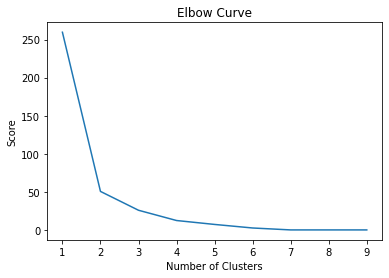

In [49]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_filt[['lat']]
X_axis = df_filt[['lng']]
score = [kmeans[i].fit(property_clustering).inertia_ for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [50]:
from sklearn.metrics import silhouette_score
silh_df = property_clustering
for i in range(2,8):
  kmeans = KMeans(n_clusters=i).fit(silh_df)
  labels_ = kmeans.labels_
  coef = silhouette_score(silh_df,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 2, score: 0.7122384664844124
N_cluster: 3, score: 0.7035769181418999
N_cluster: 4, score: 0.7388596296711039
N_cluster: 5, score: 0.8660353234275127
N_cluster: 6, score: 0.9490635904029654
N_cluster: 7, score: 0.9945051883541731


In [51]:
df_filt

,Cluster Labels,lat,lng
0,1,-22.915969,-43.230628
1,2,-22.912098,-43.236651
2,5,-22.919445,-43.234497
3,5,-22.922829,-43.231915
4,5,-22.923311,-43.231805
...,...,...,...
45,5,-22.927237,-43.235858
46,0,-22.921495,-43.242150
47,0,-22.923894,-43.243463
48,5,-22.925436,-43.235918


## Clusters Chart

Let us now cluster those locations to create centers of zones containing good locations. Those zones, their centers and addresses will be the final result of our analysis.

In [52]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[-22.915969, -43.230628], zoom_start=11)
kclusters = 7

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_filt['lat'], df_filt['lng'], df_filt['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### With the cluster, where k = 5, the points were divided into better clusters, but there were still outlier points that hinder the correct prediction of schools vs establishments (stationery shops).
#### Therefore, increase the k to 7 and test to see the best grouping of the clusters until the outliers were isolated in another cluster. Another solution would be to remove these points from the original dataframe. 

In [53]:
#Insert in the original dataframe with the labels identified in k-means

In [54]:
df_new.insert(0, 'Cluster Labels', kmeans.labels_)

In [55]:
df_new.head()

,Cluster Labels,name,categories,lat,lng,distance,id,id_global
0,1,Papelaria Porto Seguro,Paper / Office Supplies Store,-22.915969,-43.230628,427,4e946c658b81ef41a94b7377,0
1,2,Papelaria Yunes,Bookstore,-22.912098,-43.236651,561,4f6258a3e4b0832f00d7d3cd,0
2,4,papelaria raposo,Locksmith,-22.919445,-43.234497,879,53c547c1498ef1a0284198aa,0
3,4,Papelaria Papel Moderno,Stationery Store,-22.922829,-43.231915,1189,549da21b498e520a4e30b6b6,0
4,4,Papelaria Saens Pena,Arts & Crafts Store,-22.923311,-43.231805,1242,4d318a195017a0939722409b,0


Counting of schools by stationery stores

In [56]:
df_new.groupby(["Cluster Labels", "id_global"])["id_global"].count()

Cluster Labels  id_global
0               0             9
                1            11
1               0             4
                1            17
2               0             5
                1             7
3               0             6
                1             3
4               0            10
                1             6
5               0             1
                1             5
6               0             2
                1             1
Name: id_global, dtype: int64

This concludes our cluster analysis, where number "0" refers to stationery and number "1" refers to colleges.



# **Results and Discussion**

Our analysis shows that, there are many schools that are well served by stationers in the region, there is low deity in only three locations. The highest concentration of schools was detected in the Maracanã, São Cristovão and Vila Isabel regions, so we focused on these areas to assess how many stationers are contained in them.

The possibility of business becomes difficult if you think about the number of stationery stores in some regions, which have few schools and many stationery stores by area. But there is also the opportunity to have many schools with few stationery stores, in these regions it is necessary to identify the best point.

The result of all of this is 3 zones containing a significant number of schools based on the number of existing locations. This, of course, does not mean that these zones are, in fact, ideal places for a new stationery store! The purpose of this analysis was to provide only information about areas close to Maracanã, but not overflowing with stationery - there is a possibility that there are other reasons for not having so many stationery stores in these regions. The recommended zones should therefore only be considered as a starting point for a more detailed analysis that could eventually result in a location that not only has no competition nearby, but also other factors taken into account and all other relevant conditions met.


# **Conclusion** 

The objective of this project was to identify the areas of Rio de Janeiro close to Maracanã with a low number of stationery stores, in order to help interested parties to restrict the search for the ideal location for a new stationery store. Calculating the distribution of schools from Foursquare data, we first identify the schools closest to the central point, then we generate another distribution of points where the stationers are grouped in the region. The grouping of these sites was then carried out in order to create the main zones of interest (containing the largest number of potential sites) and the addresses of these zone centers were created to be used as starting points for the final exploration by the interested parties.

The final decision on the ideal location of the stationery will be at the discretion of the interested parties based on the specific characteristics of the locations in each recommended zone, taking into account additional factors such as the attractiveness of each location (proximity to offices or shopping centers), levels of noise / proximity to main roads, real estate availability, prices, social and economic dynamics of each neighborhood, etc.

